In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(1, '../')
from tracklikelihood.track import *
from tracklikelihood.spectrogram import *
from tracklikelihood.likelihood import *
import time

In [2]:
os.chdir('../plots')

In [3]:
f_bins = 130
t_bins = 200
#t_min = 0.0
#t_max = 50
#f_min = 0
#f_max = 100*1e6

tminm = 4
tmaxm = 12.2
fminM = 8
fmaxM = 11.2
t_min = tminm*1e-3
t_max = tmaxm*1e-3
f_min = fminM*1e6
f_max = fmaxM*1e6

t=np.linspace(t_min, t_max, t_bins)
f=np.linspace(f_min, f_max, f_bins)
dt = t[1]-t[0]
df = f[1]-f[0]

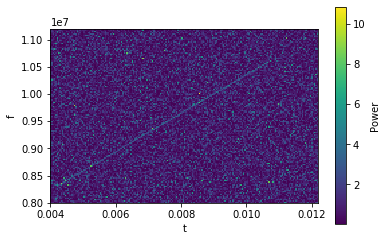

In [15]:
#snr_in = 100000
sigma_in = 0.05*df
snr_in = 20*sigma_in*np.sqrt(2*np.pi)
t_start_in = 4.2*1e-3
f_start_in = 8.3*1e6
length_in = 6.5*1e-3
slope_in = 0.3523*1e9#df/dt #300 MHz/s
img_name = 'hi_snr_long'

tracks=[Track.from_slope_and_length(t_start_in, f_start_in, slope_in, length_in, sigma_in, snr_in)]
      
spec_0 = Spectrogram.from_tracks(t, f, tracks, img_name)
spec_0.plot()

In [16]:
snr = snr_in
length = length_in
sigma = sigma_in
t_start = t_start_in
f_start = f_start_in
slope = slope_in

Track hypothesis


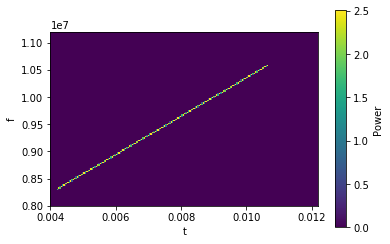

Likelihood values


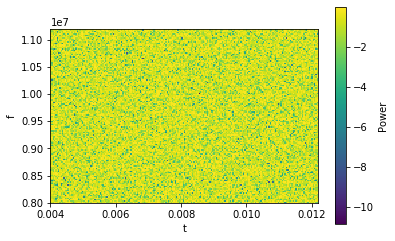

In [17]:
dt = 0
track_hypothesis = Track.from_slope_and_length(t_start+dt, f_start+dt*slope, 
                                                                 slope, length, sigma, snr) 

plot_hypothesis(spec_0, track_hypothesis)

In [ ]:
scan_t = np.arange(t_min, t_max, 1)
scan_f = np.arange(f_min, f_max, 1)
scan_sl = np.arange(0.1, 1.5, 0.1)
scan_snr = np.arange(1, 30, 1)
scan_length = np.arange(0.1, t_max-t_min, 1)
#scan_sigma = 

lh = np.empty(shape=[scan_t.shape[0], scan_f.shape[0], scan_sl.shape[0], scan_snr.shape[0], scan_length.shape[0]])

for i, t_val in enumerate(scan_t):
    for j, f_val in enumerate(scan_f):
        for k, s_val in enumerate(scan_sl):
            for l, snr_val in enumerate(scan_snr):
                for m, length_val in enumerate(scan_length):
                    lh[i,j,k,l,m] = get_likelihood(spec_0, t, f, Track.from_slope_and_length(t_val, f_val, s_val,
                                                                                   length_val, sigma, snr_val))
    print(i, 'of', scan_t.shape[0], 'iterations done')
minimum = np.unravel_index(lh.argmin(), lh.shape)

In [ ]:
print('minimum: ', scan_t[minimum[0]], scan_f[minimum[1]], scan_sl[minimum[2]], 
          scan_snr[minimum[3]], scan_length[minimum[4]])

In [ ]:
4096/100

In [ ]:
lh_func = lambda x, y: get_likelihood(spec_0, t, f, 
                                       Track.from_slope_and_length(x, y, slope, length, sigma, snr))
scan_and_plot_2d(lh_func, t_start-2, t_start+2, 0.01, t_start, f_start-5, f_start+5, 0.01, f_start, 't_start', 'f_start', img_name)

Scanning time:  1.704355001449585
----------- slope -----------
True val:  352300000.0 Found minimum:  3320000000.0


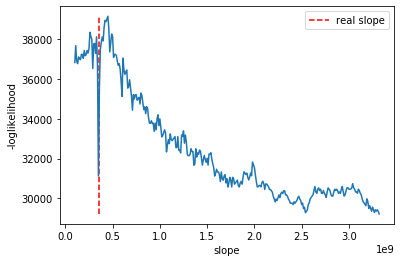

Scanning time:  2.948949098587036
----------- length -----------
True val:  0.006500000000000001 Found minimum:  25.400000000000002


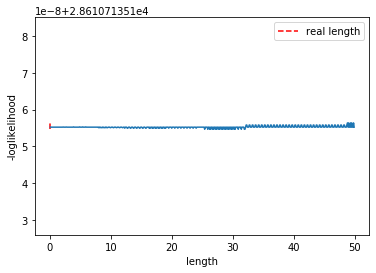

Scanning time:  1.8663311004638672
----------- snr -----------
True val:  62179.92619239736 Found minimum:  34.900000000000006


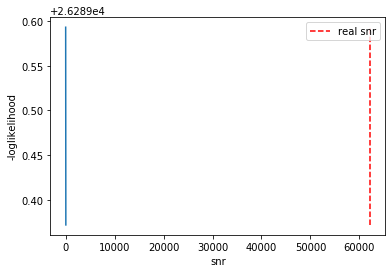

Scanning time:  2.6952857971191406
----------- sigma -----------
True val:  1240.3100775193889 Found minimum:  0.1


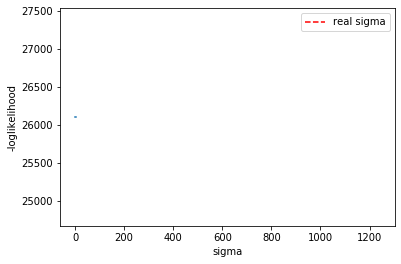

Scanning time:  0.006871223449707031
----------- t_start -----------
True val:  0.004200000000000001 Found minimum:  0.004


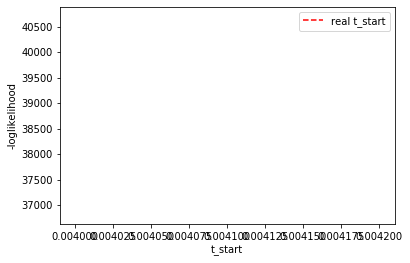

KeyboardInterrupt: 

In [18]:
lh_func = lambda x: get_likelihood(spec_0,
                                       Track.from_slope_and_length(t_start, f_start, x, length, sigma, snr))
scan_and_plot(lh_func, 0.1*1e9, 3.33*1e9, 0.01*1e9, slope, 'slope', img_name)


lh_func = lambda x: get_likelihood(spec_0, 
                                       Track.from_slope_and_length(t_start, f_start, slope, x, sigma, snr))
scan_and_plot(lh_func, 0.1, 50, 0.1, length, 'length', img_name)

lh_func = lambda x: get_likelihood(spec_0, 
                                       Track.from_slope_and_length(t_start, f_start, slope, length, sigma, x))
scan_and_plot(lh_func, 0.1, 35, 0.1, snr, 'snr', img_name)

lh_func = lambda x: get_likelihood(spec_0, 
                                       Track.from_slope_and_length(t_start, f_start, slope, length, x, snr))
scan_and_plot(lh_func, 0.1, 5, 0.01, sigma, 'sigma', img_name)

lh_func = lambda x: get_likelihood(spec_0, 
                                       Track.from_slope_and_length(x, f_start, slope, length, sigma, snr))
scan_and_plot(lh_func, t_min, t_max, 0.01, t_start, 't_start', img_name)

lh_func = lambda x: get_likelihood(spec_0, 
                                       Track.from_slope_and_length(t_start, x, slope, length, sigma, snr))
scan_and_plot(lh_func, f_min, f_max, 1, f_start, 'f_start', img_name)